In [ ]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Отображение таблицы
data = pd.read_csv('b_data.csv')
display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,underground,residential_complex,year_of_construction
0,https://www.cian.ru/sale/flat/283856125/,Пересвет,22.0,34.0,2.0,NaN,NaN,50.6,60980000.0,59900000.0,59240000.0,Дорогомилово,Поклонная,Кутузовская,Поклонная 9,NaN
1,https://www.cian.ru/sale/flat/300539749/,Пересвет,8.0,8.0,3.0,66.0,10.0,81.0,51450000.0,49500000.0,50000000.0,Арбат,Арбат,Смоленская,NaN,1910.0
2,https://www.cian.ru/sale/flat/293713880/,Пересвет,2.0,14.0,2.0,34.6,15.5,85.6,162460000.0,158770000.0,156750000.0,Якиманка,NaN,Боровицкая,Лаврушинский ЖК,0.0
3,https://www.cian.ru/sale/flat/300006012/,Пересвет,8.0,8.0,3.0,10.0,0.0,81.0,51640000.0,50450000.0,50000000.0,Арбат,Арбат,Смоленская,NaN,1910.0
4,https://www.cian.ru/sale/flat/300266348/,Пересвет,2.0,14.0,2.0,NaN,NaN,76.3,76980000.0,74540000.0,74540000.0,Пресненский,Электрический переулок,Белорусская,Квартал Тишинский бульвар,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.7,6180000.0,6080000.0,6000000.0,Звенигород,Нахабинское шоссе,NaN,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.5,10.3,51.6,7440000.0,7280000.0,7200000.0,Звенигород,Почтовая,NaN,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000.0,4230000.0,4190000.0,NaN,Радужная,Строгино,NaN,1961.0
43792,https://zvenigorod.cian.ru/sale/flat/301339431/,Звенигород,9.0,15.0,1.0,18.5,11.6,44.4,5660000.0,5440000.0,5500000.0,NaN,NaN,NaN,NaN,2014.0


In [ ]:
# Удаление городов не из московской области
spisok = ["Верея", "Высоковск", "Дрезна", "Талдом", "Руза", "Краснозаводск",
  "Пересвет", "Яхрома", "Голицыно", "Волоколамск", "Рошаль", "Кубинка",
  "Куровское", "Пущино", "Электроугли", "Черноголовка", "Хотьково",
  "Звенигород", "Бронницы", "Электрогорск", "Зарайск", "Старая Купавна",
  "Озёры", "Лосино-Петровский", "Красноармейск", "Ликино-Дулёво", "Можайск",
  "Луховицы", "Дедовск", "Апрелевка", "Шатура", "Истра", "Протвино",
  "Краснознаменск", "Кашира", "Котельники", "Солнечногорск", "Дзержинский",
  "Лыткарино", "Фрязино", "Павловский Посад", "Наро-Фоминск", "Ступино",
  "Дмитров", "Чехов", "Егорьевск", "Дубна", "Видное", "Клин", "Ивантеевка",
  "Лобня", "Воскресенск", "Сергиев Посад", "Ногинск", "Жуковский", "Пушкино",
  "Реутов", "Долгопрудный", "Орехово-Зуево", "Раменское", "Щёлково",
  "Серпухов", "Одинцово", "Домодедово", "Коломна", "Электросталь",
  "Красногорск", "Люберцы", "Королёв", "Мытищи", "Химки", "Подольск", "Балашиха",
          "Москва"]

data = data[data['location'].isin(spisok)]
display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,underground,residential_complex,year_of_construction
0,https://www.cian.ru/sale/flat/283856125/,Пересвет,22.0,34.0,2.0,NaN,NaN,50.6,60980000.0,59900000.0,59240000.0,Дорогомилово,Поклонная,Кутузовская,Поклонная 9,NaN
1,https://www.cian.ru/sale/flat/300539749/,Пересвет,8.0,8.0,3.0,66.0,10.0,81.0,51450000.0,49500000.0,50000000.0,Арбат,Арбат,Смоленская,NaN,1910.0
2,https://www.cian.ru/sale/flat/293713880/,Пересвет,2.0,14.0,2.0,34.6,15.5,85.6,162460000.0,158770000.0,156750000.0,Якиманка,NaN,Боровицкая,Лаврушинский ЖК,0.0
3,https://www.cian.ru/sale/flat/300006012/,Пересвет,8.0,8.0,3.0,10.0,0.0,81.0,51640000.0,50450000.0,50000000.0,Арбат,Арбат,Смоленская,NaN,1910.0
4,https://www.cian.ru/sale/flat/300266348/,Пересвет,2.0,14.0,2.0,NaN,NaN,76.3,76980000.0,74540000.0,74540000.0,Пресненский,Электрический переулок,Белорусская,Квартал Тишинский бульвар,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.7,6180000.0,6080000.0,6000000.0,Звенигород,Нахабинское шоссе,NaN,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.5,10.3,51.6,7440000.0,7280000.0,7200000.0,Звенигород,Почтовая,NaN,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000.0,4230000.0,4190000.0,NaN,Радужная,Строгино,NaN,1961.0
43792,https://zvenigorod.cian.ru/sale/flat/301339431/,Звенигород,9.0,15.0,1.0,18.5,11.6,44.4,5660000.0,5440000.0,5500000.0,NaN,NaN,NaN,NaN,2014.0


In [ ]:
# Конвертирование из объектов в float
data['kitchen_meters'] = data['kitchen_meters'].astype(float)
data['year_of_construction'] = data['year_of_construction'].astype(float)

In [ ]:
# Удаление дубликатов
data.drop_duplicates()

# Проверить результат
display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,residential_complex,year_of_construction
0,https://www.cian.ru/sale/flat/283856125/,Пересвет,22.0,34.0,2.0,NaN,NaN,50.6,60980000.0,59900000.0,59240000.0,Дорогомилово,Поклонная,Поклонная 9,NaN
1,https://www.cian.ru/sale/flat/300539749/,Пересвет,8.0,8.0,3.0,66.0,10.0,81.0,51450000.0,49500000.0,50000000.0,Арбат,Арбат,NaN,1910.0
2,https://www.cian.ru/sale/flat/293713880/,Пересвет,2.0,14.0,2.0,34.6,15.5,85.6,162460000.0,158770000.0,156750000.0,Якиманка,NaN,Лаврушинский ЖК,0.0
3,https://www.cian.ru/sale/flat/300006012/,Пересвет,8.0,8.0,3.0,10.0,0.0,81.0,51640000.0,50450000.0,50000000.0,Арбат,Арбат,NaN,1910.0
4,https://www.cian.ru/sale/flat/300266348/,Пересвет,2.0,14.0,2.0,NaN,NaN,76.3,76980000.0,74540000.0,74540000.0,Пресненский,Электрический переулок,Квартал Тишинский бульвар,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.7,6180000.0,6080000.0,6000000.0,Звенигород,Нахабинское шоссе,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.5,10.3,51.6,7440000.0,7280000.0,7200000.0,Звенигород,Почтовая,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000.0,4230000.0,4190000.0,NaN,Радужная,NaN,1961.0
43792,https://zvenigorod.cian.ru/sale/flat/301339431/,Звенигород,9.0,15.0,1.0,18.5,11.6,44.4,5660000.0,5440000.0,5500000.0,NaN,NaN,NaN,2014.0


In [ ]:
# Преобразование строковых значений в числа, если возможно
def try_convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return value

spisok = ["url", "location", "floor", "floors_count", "rooms_count",
          "total_meters", "price_feb",	"price_apr",	"price_may",
          "district", "street", "residential_complex",
          "living_meters",	"kitchen_meters",	"year_of_construction"]

for i in spisok:
  data[i] = data[i].apply(try_convert_to_int)

display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,residential_complex,year_of_construction
0,https://www.cian.ru/sale/flat/283856125/,Пересвет,22,34,2,NaN,NaN,50,60980000,59900000,59240000,Дорогомилово,Поклонная,Поклонная 9,NaN
1,https://www.cian.ru/sale/flat/300539749/,Пересвет,8,8,3,66.0,10.0,81,51450000,49500000,50000000,Арбат,Арбат,NaN,1910.0
2,https://www.cian.ru/sale/flat/293713880/,Пересвет,2,14,2,34.0,15.0,85,162460000,158770000,156750000,Якиманка,NaN,Лаврушинский ЖК,0.0
3,https://www.cian.ru/sale/flat/300006012/,Пересвет,8,8,3,10.0,0.0,81,51640000,50450000,50000000,Арбат,Арбат,NaN,1910.0
4,https://www.cian.ru/sale/flat/300266348/,Пересвет,2,14,2,NaN,NaN,76,76980000,74540000,74540000,Пресненский,Электрический переулок,Квартал Тишинский бульвар,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11,18,2,32.0,11.0,51,6180000,6080000,6000000,Звенигород,Нахабинское шоссе,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2,6,2,28.0,10.0,51,7440000,7280000,7200000,Звенигород,Почтовая,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3,3,2,25.0,6.0,44,4330000,4230000,4190000,NaN,Радужная,NaN,1961.0
43792,https://zvenigorod.cian.ru/sale/flat/301339431/,Звенигород,9,15,1,18.0,11.0,44,5660000,5440000,5500000,NaN,NaN,NaN,2014.0


In [ ]:
# Замена чисел на NaN
def replace_numbers_with_nan(x):
    if isinstance(x, (int, float)):
        return np.nan
    else:
        return x

spisok = ["url", "location", "district", "street",
          "residential_complex"]

for i in spisok:
  data[i] = data[i].apply(replace_numbers_with_nan)

In [ ]:
# Подсчёт отрицательных значений в столбцах
spisok = ["floor", "floors_count", "rooms_count",
          "total_meters", "price_feb",	"price_apr",
          "price_may", "living_meters",
          "kitchen_meters",	"year_of_construction"]

data1 = data

for i in spisok:
  # Преобразование столбца в числовой формат с пропуском значений, которые не могут быть преобразованы
  data1[i] = pd.to_numeric(data1[i], errors='coerce')

  # Подсчёт количества отрицательных значений в столбце
  negative_count = data1[data1[i] < 0][i].count()

  print(f"Количество отрицательных значений в столбце {i}:", negative_count)

Количество отрицательных значений в столбце floor: 319
Количество отрицательных значений в столбце floors_count: 319
Количество отрицательных значений в столбце rooms_count: 1413
Количество отрицательных значений в столбце total_meters: 3
Количество отрицательных значений в столбце price_feb: 0
Количество отрицательных значений в столбце price_apr: 0
Количество отрицательных значений в столбце price_may: 0
Количество отрицательных значений в столбце living_meters: 0
Количество отрицательных значений в столбце kitchen_meters: 0
Количество отрицательных значений в столбце year_of_construction: 0


In [ ]:
# Замена отрицательных значений на NaN
def replace_negative_with_nan(x):
    if isinstance(x, (int, float)) and x < 0:
        return np.nan
    else:
        return x

spisok = ["floor", "floors_count", "rooms_count", "total_meters",
          "price_feb",	"price_apr",	"price_may", "living_meters",
          "kitchen_meters",	"year_of_construction"]

for i in spisok:
  data[i] = data[i].apply(replace_negative_with_nan)

In [ ]:
# Подсчёт отрицательных значений в столбцах
spisok = ["floor", "floors_count", "rooms_count", "total_meters",
          "price_feb",	"price_apr",	"price_may", "living_meters",
          "kitchen_meters",	"year_of_construction"]

for i in spisok:
  # Преобразование столбца в числовой формат с пропуском значений, которые не могут быть преобразованы
  data[i] = pd.to_numeric(data[i], errors='coerce')

  # Подсчёт количества отрицательных значений в столбце
  negative_count = data[data[i] < 0][i].count()

  print(f"Количество отрицательных значений в столбце {i}:", negative_count)

Количество отрицательных значений в столбце floor: 0
Количество отрицательных значений в столбце floors_count: 0
Количество отрицательных значений в столбце rooms_count: 0
Количество отрицательных значений в столбце total_meters: 0
Количество отрицательных значений в столбце price_feb: 0
Количество отрицательных значений в столбце price_apr: 0
Количество отрицательных значений в столбце price_may: 0
Количество отрицательных значений в столбце living_meters: 0
Количество отрицательных значений в столбце kitchen_meters: 0
Количество отрицательных значений в столбце year_of_construction: 0


In [ ]:
# Подсчёт количества пустых значений в каждом столбце
null_count = data.isnull().sum()

# Вывод столбцов, в которых есть пустые значения
print("Пустые значения в датасете:")
print(null_count[null_count > 0])

Пустые значения в датасете:
floor                     319
floors_count              319
rooms_count              1413
living_meters           12260
kitchen_meters          12260
total_meters                3
district                20429
street                   5847
residential_complex     18797
year_of_construction    12260
dtype: int64


In [ ]:
data.shape

(43794, 15)

In [ ]:
# Удаление строк с пустыми значениями в столбце street
data = data.dropna(subset=["street"])

display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,residential_complex,year_of_construction
0,https://www.cian.ru/sale/flat/283856125/,Пересвет,22.0,34.0,2.0,NaN,NaN,50.0,60980000,59900000,59240000,Дорогомилово,Поклонная,Поклонная 9,NaN
1,https://www.cian.ru/sale/flat/300539749/,Пересвет,8.0,8.0,3.0,66.0,10.0,81.0,51450000,49500000,50000000,Арбат,Арбат,NaN,1910.0
3,https://www.cian.ru/sale/flat/300006012/,Пересвет,8.0,8.0,3.0,10.0,0.0,81.0,51640000,50450000,50000000,Арбат,Арбат,NaN,1910.0
4,https://www.cian.ru/sale/flat/300266348/,Пересвет,2.0,14.0,2.0,NaN,NaN,76.0,76980000,74540000,74540000,Пресненский,Электрический переулок,Квартал Тишинский бульвар,NaN
5,https://www.cian.ru/sale/flat/300539770/,Пересвет,3.0,5.0,NaN,120.0,20.0,170.0,77150000,75620000,75000000,Тверской,Большая Дмитровка,NaN,1912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43785,https://zvenigorod.cian.ru/sale/flat/301947726/,Звенигород,5.0,12.0,2.0,40.0,9.0,67.0,8260000,8090000,8000000,Продается 2-х комнатная квартира в мк Пронина,кладовка. Вся инфраструктура рядом. Полная сто...,NaN,2007.0
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.0,6180000,6080000,6000000,Звенигород,Нахабинское шоссе,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.0,10.0,51.0,7440000,7280000,7200000,Звенигород,Почтовая,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000,4230000,4190000,NaN,Радужная,NaN,1961.0


In [ ]:
# Замена всех NaN на "Отсутствует", так как не все города имеют деление по районам, а также не все здания относятся к ЖК
spisok = ["district",	"residential_complex"]

for i in spisok:
  data[i] = data[i].fillna('Отсутствует')

<ipython-input-334-9475f28eb44b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].fillna('Отсутствует')


In [ ]:
print(data.isnull().sum())

url                         0
location                    0
floor                     220
floors_count              220
rooms_count              1217
living_meters           10102
kitchen_meters          10102
total_meters                3
price_feb                   0
price_apr                   0
price_may                   0
district                    0
street                      0
residential_complex         0
year_of_construction    10102
dtype: int64


In [ ]:
data[['living_meters', 'kitchen_meters', 'year_of_construction']] = data[['living_meters', 'kitchen_meters', 'year_of_construction']].replace(0, pd.NA)

<ipython-input-336-4f53845bd547>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['living_meters', 'kitchen_meters', 'year_of_construction']] = data[['living_meters', 'kitchen_meters', 'year_of_construction']].replace(0, pd.NA)


In [ ]:
data = data.dropna()
display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,residential_complex,year_of_construction
1,https://www.cian.ru/sale/flat/300539749/,Пересвет,8.0,8.0,3.0,66.0,10.0,81.0,51450000,49500000,50000000,Арбат,Арбат,Отсутствует,1910.0
9,https://www.cian.ru/sale/flat/301450189/,Пересвет,26.0,31.0,5.0,140.0,28.0,246.0,329400000,322690000,319800000,Очаково-Матвеевское,Нежинская,Кутузовская Ривьера,2008.0
39,https://www.cian.ru/sale/flat/301559691/,Пересвет,2.0,4.0,3.0,100.0,26.0,140.0,233300000,224670000,226940000,Мещанский,Рождественский бульвар,Отсутствует,1903.0
51,https://www.cian.ru/sale/flat/252671392/,Пересвет,1.0,4.0,4.0,107.0,24.0,182.0,188550000,184390000,182720000,Арбат,Большой Афанасьевский переулок,Отсутствует,1912.0
55,https://www.cian.ru/sale/flat/295370167/,Пересвет,2.0,6.0,3.0,61.0,15.0,110.0,102100000,100020000,99000000,Пресненский,Малая Бронная,Отсутствует,1912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43785,https://zvenigorod.cian.ru/sale/flat/301947726/,Звенигород,5.0,12.0,2.0,40.0,9.0,67.0,8260000,8090000,8000000,Продается 2-х комнатная квартира в мк Пронина,кладовка. Вся инфраструктура рядом. Полная сто...,Отсутствует,2007.0
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.0,6180000,6080000,6000000,Звенигород,Нахабинское шоссе,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.0,10.0,51.0,7440000,7280000,7200000,Звенигород,Почтовая,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000,4230000,4190000,Отсутствует,Радужная,Отсутствует,1961.0


In [ ]:
print(data.isnull().sum())

url                     0
location                0
floor                   0
floors_count            0
rooms_count             0
living_meters           0
kitchen_meters          0
total_meters            0
price_feb               0
price_apr               0
price_may               0
district                0
street                  0
residential_complex     0
year_of_construction    0
dtype: int64


In [ ]:
# Подсчёт количества пустых значений в каждом столбце
null_count = data.isnull().sum()

# Вывод столбцов, в которых есть пустые значения
print("Пустые значения в датасете:")
print(null_count[null_count > 0])

Пустые значения в датасете:
Series([], dtype: int64)


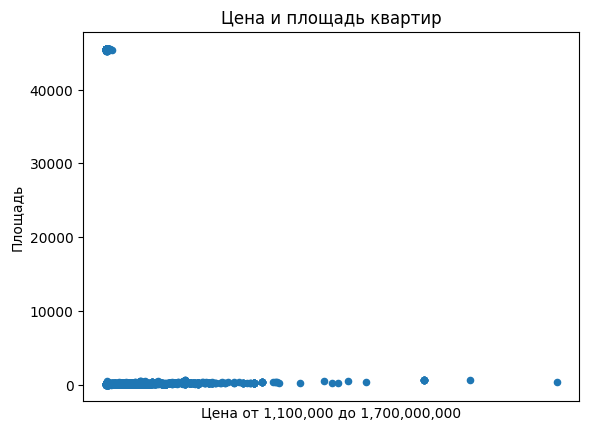

In [ ]:
# Отображение диаграммы
data.plot(kind='scatter', x='price_may', y='total_meters')

# Настройка осей и заголовка диаграммы
plt.xlabel(f'Цена от {format(round(min(data.price_may.values), 0), ",")} до {format(round(max(data.price_may.values), 0), ",")}')
plt.ylabel('Площадь')
plt.title('Цена и площадь квартир')
plt.xticks([])
# Отображение диаграммы на графике
plt.show()

In [ ]:
data.shape

(19247, 15)

In [ ]:
# Конвертирование из объектов в float
data['kitchen_meters'] = data['kitchen_meters'].astype(float)
data['year_of_construction'] = data['year_of_construction'].astype(float)

In [ ]:
data.describe()

,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,year_of_construction
count,19247.00000,19247.000000,19247.000000,19247.000000,19247.000000,19247.000000,1.924700e+04,1.924700e+04,1.924700e+04,19247.000000
mean,7.65366,14.174313,2.093002,37.289292,10.721671,1881.217229,2.615128e+07,2.608606e+07,2.599617e+07,1996.181847
std,6.91921,9.919902,1.031549,29.495018,6.030535,8893.235821,6.331599e+07,6.379683e+07,6.371230e+07,26.772916
min,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.130000e+06,1.110000e+06,1.100000e+06,1500.000000
25%,3.00000,6.000000,1.000000,19.000000,7.000000,42.000000,6.660000e+06,6.480000e+06,6.450000e+06,1975.000000
50%,5.00000,13.000000,2.000000,30.000000,9.000000,54.000000,9.070000e+06,8.870000e+06,8.800000e+06,2007.000000
75%,10.00000,18.000000,3.000000,43.000000,12.000000,75.000000,1.442000e+07,1.415500e+07,1.400000e+07,2016.000000
max,82.00000,95.000000,5.000000,600.000000,100.000000,45565.000000,1.598290e+09,1.674230e+09,1.700000e+09,2024.000000


In [ ]:
# Удаление выбросов
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

# Применение функции для удаления выбросов
data = remove_outliers(data, "price_feb")
data = remove_outliers(data, "price_apr")
data = remove_outliers(data, "price_may")
data = remove_outliers(data, "year_of_construction")
data = remove_outliers(data, "total_meters")

display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,residential_complex,year_of_construction
103,https://sochi.cian.ru/sale/flat/293449179/,Пересвет,11.0,17.0,3.0,55.0,15.0,73.0,14500000,14150000,14000000,Центральный,Парковая,Отсутствует,2018.0
205,https://sochi.cian.ru/sale/flat/268041987/,Пересвет,14.0,20.0,2.0,40.0,12.0,63.0,11690000,11430000,11300000,Хостинский,Яна Фабрициуса,Золотой колос,2014.0
211,https://sochi.cian.ru/sale/flat/277011204/,Пересвет,14.0,19.0,2.0,30.0,10.0,45.0,12910000,12620000,12500000,Хостинский,Есауленко,Южное море,2019.0
295,https://krasnodar.cian.ru/sale/flat/287129578/,Пересвет,8.0,10.0,2.0,22.0,10.0,42.0,9910000,9730000,9600000,Сириус пгт,тупик Нагорный,Отсутствует,2015.0
409,https://sochi.cian.ru/sale/flat/293449179/,Верея,11.0,17.0,3.0,55.0,15.0,73.0,14430000,14150000,14000000,Центральный,Парковая,Отсутствует,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43785,https://zvenigorod.cian.ru/sale/flat/301947726/,Звенигород,5.0,12.0,2.0,40.0,9.0,67.0,8260000,8090000,8000000,Продается 2-х комнатная квартира в мк Пронина,кладовка. Вся инфраструктура рядом. Полная сто...,Отсутствует,2007.0
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.0,6180000,6080000,6000000,Звенигород,Нахабинское шоссе,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.0,10.0,51.0,7440000,7280000,7200000,Звенигород,Почтовая,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000,4230000,4190000,Отсутствует,Радужная,Отсутствует,1961.0


In [ ]:
# Удаление выбросов
data = data.drop(data[data['kitchen_meters'] < 5].index)
data = data.drop(data[data['living_meters'] < 10].index)

In [ ]:
data.describe()

,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,year_of_construction
count,14143.000000,14143.000000,14143.000000,14143.000000,14143.000000,14143.000000,1.414300e+04,1.414300e+04,1.414300e+04,14143.000000
mean,6.958142,12.741568,1.845082,28.665418,9.464753,50.693983,8.707465e+06,8.530957e+06,8.468868e+06,1995.658135
std,5.336408,6.992654,0.771412,10.720959,3.487844,14.660852,3.119361e+06,3.082877e+06,3.068316e+06,22.261842
min,1.000000,1.000000,1.000000,10.000000,5.000000,19.000000,1.130000e+06,1.110000e+06,1.100000e+06,1916.000000
25%,3.000000,5.000000,1.000000,19.000000,7.000000,40.000000,6.400000e+06,6.250000e+06,6.200000e+06,1974.000000
50%,5.000000,12.000000,2.000000,28.000000,9.000000,46.000000,8.130000e+06,7.920000e+06,7.900000e+06,2005.000000
75%,10.000000,17.000000,2.000000,35.000000,11.000000,60.000000,1.073000e+07,1.051000e+07,1.050000e+07,2015.000000
max,42.000000,46.000000,5.000000,73.000000,38.000000,97.000000,1.774000e+07,1.753000e+07,1.720000e+07,2024.000000


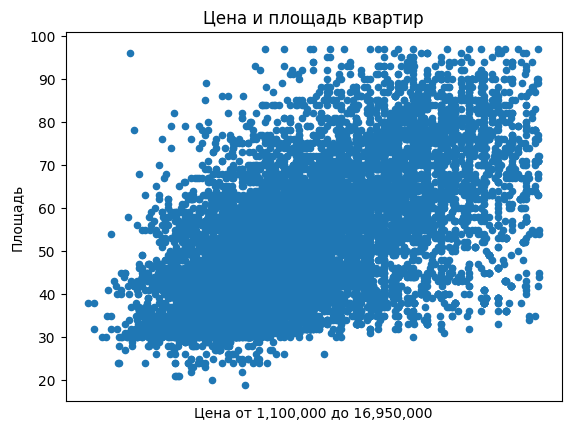

In [ ]:
data = remove_outliers(data, "price_may")# Отображение диаграммы
data.plot(kind='scatter', x='price_may', y='total_meters')

# Настройка осей и заголовка диаграммы
plt.xlabel(f'Цена от {format(round(min(data.price_may.values), 0), ",")} до {format(round(max(data.price_may.values), 0), ",")}')
plt.ylabel('Площадь')
plt.title('Цена и площадь квартир')
plt.xticks([])
# Отображение диаграммы на графике
plt.show()

In [ ]:
spisok = ["district",	"street",	"residential_complex"]

for pere in spisok:
  # Подсчет количества уникальных значений в колонке location
  location_counts = data[pere].value_counts()

  location_counts_dict = location_counts.to_dict()

  # Определение уникальных значений из location_counts, которые встречаются только один раз
  unique_values_to_remove = location_counts[location_counts == 1].index

  # Удаление всех полей, где значение встречается только один раз
  data = data[~data[pere].isin(unique_values_to_remove)]

# Вывод данных после удаления
display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,residential_complex,year_of_construction
103,https://sochi.cian.ru/sale/flat/293449179/,Пересвет,11.0,17.0,3.0,55.0,15.0,73.0,14500000,14150000,14000000,Центральный,Парковая,Отсутствует,2018.0
205,https://sochi.cian.ru/sale/flat/268041987/,Пересвет,14.0,20.0,2.0,40.0,12.0,63.0,11690000,11430000,11300000,Хостинский,Яна Фабрициуса,Золотой колос,2014.0
211,https://sochi.cian.ru/sale/flat/277011204/,Пересвет,14.0,19.0,2.0,30.0,10.0,45.0,12910000,12620000,12500000,Хостинский,Есауленко,Южное море,2019.0
295,https://krasnodar.cian.ru/sale/flat/287129578/,Пересвет,8.0,10.0,2.0,22.0,10.0,42.0,9910000,9730000,9600000,Сириус пгт,тупик Нагорный,Отсутствует,2015.0
409,https://sochi.cian.ru/sale/flat/293449179/,Верея,11.0,17.0,3.0,55.0,15.0,73.0,14430000,14150000,14000000,Центральный,Парковая,Отсутствует,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43785,https://zvenigorod.cian.ru/sale/flat/301947726/,Звенигород,5.0,12.0,2.0,40.0,9.0,67.0,8260000,8090000,8000000,Продается 2-х комнатная квартира в мк Пронина,кладовка. Вся инфраструктура рядом. Полная сто...,Отсутствует,2007.0
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.0,6180000,6080000,6000000,Звенигород,Нахабинское шоссе,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.0,10.0,51.0,7440000,7280000,7200000,Звенигород,Почтовая,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000,4230000,4190000,Отсутствует,Радужная,Отсутствует,1961.0


In [ ]:
# Удаление мусора из колонки район
pereb = ["Продается 2-х комнатная квартира в мк Пронина", "удобный выезд на Ярославское шоссе",
         "ЛУЧШАЯ кв-ра в е!Свежий ремонт3-комн. квартира", "озеро-пляж. Отличная экология. До ж/д станции Кубинка 7 минут транспортом. Удобный выезд на Минское",
         "расположенный в городе Балашиха всего в 8 км от МКАД", "планируется открытие в 2024 г.", "Лучшая просторная 1 к.кв. в е!1-комн. квартира",
         "Кв-ра в развитом е!1-комн. квартира"]

data = data[~data["district"].isin(pereb)]

# Вывод количества уникальных районов в таблице
cities = data['district'].value_counts().to_string()
print(cities)

district
Отсутствует                            9177
Клин                                    284
Западный                                266
Центральный                             235
Солнечногорск                           191
Дмитров                                 177
Чехов                                   177
Звенигород                              120
Фрязино                                 105
Дубна                                    97
Залинейный                               91
Ступино                                  78
мкр. Центральный                         76
мкр. Восточный                           75
Егорьевск                                70
Хотьково                                 66
Лосино-Петровский                        64
Центральный мкр                          59
Воскресенск                              54
мкр. Юго-Западный                        53
мкр. Южный                               53
Кашира                                   52
Губернский мкр         

street
Молодежная                                                244
Ленина                                                    217
Советская                                                 212
Гагарина                                                  192
Кирова                                                    187
Курыжова                                                  156
Парковая                                                  129
Центральная                                               121
Пионерская                                                120
Юбилейная                                                 120
Комсомольская                                             117
Горького                                                  108
Юбилейный проспект                                        107
Мира                                                      106
бульвар Космонавтов                                       106
Северное шоссе                                             98
О

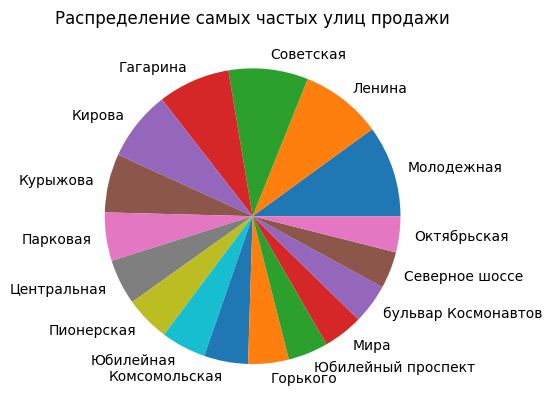

In [ ]:
# Вывод количества уникальных улиц в таблице
cities = data['street'].value_counts().to_string()
print(cities)


cities = data['street'].value_counts().head(17)  # Ограничение
labels = cities.index
values = cities.values

# Создание круговой диаграммы
plt.pie(values, labels=labels)

# Добавление заголовка
plt.title('Распределение самых частых улиц продажи')

# Вывод диаграммы
plt.show()

In [ ]:
# Удаление строк, с total_meters равному 0
data = data[data['total_meters'] != 0]

In [ ]:
display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,residential_complex,year_of_construction
103,https://sochi.cian.ru/sale/flat/293449179/,Пересвет,11.0,17.0,3.0,55.0,15.0,73.0,14500000,14150000,14000000,Центральный,Парковая,Отсутствует,2018.0
205,https://sochi.cian.ru/sale/flat/268041987/,Пересвет,14.0,20.0,2.0,40.0,12.0,63.0,11690000,11430000,11300000,Хостинский,Яна Фабрициуса,Золотой колос,2014.0
211,https://sochi.cian.ru/sale/flat/277011204/,Пересвет,14.0,19.0,2.0,30.0,10.0,45.0,12910000,12620000,12500000,Хостинский,Есауленко,Южное море,2019.0
295,https://krasnodar.cian.ru/sale/flat/287129578/,Пересвет,8.0,10.0,2.0,22.0,10.0,42.0,9910000,9730000,9600000,Сириус пгт,тупик Нагорный,Отсутствует,2015.0
409,https://sochi.cian.ru/sale/flat/293449179/,Верея,11.0,17.0,3.0,55.0,15.0,73.0,14430000,14150000,14000000,Центральный,Парковая,Отсутствует,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43774,https://zvenigorod.cian.ru/sale/flat/298784792/,Звенигород,1.0,6.0,1.0,15.0,10.0,39.0,5680000,5570000,5500000,Звенигород,Почтовая,Центральный,2023.0
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.0,6180000,6080000,6000000,Звенигород,Нахабинское шоссе,Лермонтовский,2017.0
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.0,10.0,51.0,7440000,7280000,7200000,Звенигород,Почтовая,Центральный,2023.0
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000,4230000,4190000,Отсутствует,Радужная,Отсутствует,1961.0


In [ ]:
# Конвертирование из объектов в float
data['kitchen_meters'] = data['kitchen_meters'].astype(float)
data['year_of_construction'] = data['year_of_construction'].astype(float)

In [ ]:
data.describe()

,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,year_of_construction
count,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,1.357500e+04,1.357500e+04,1.357500e+04,13575.000000
mean,6.980921,12.788140,1.846335,28.669908,9.468435,50.724273,8.662357e+06,8.474262e+06,8.408642e+06,1995.817753
std,5.336172,6.994487,0.772552,10.736424,3.479531,14.658142,3.065846e+06,3.013820e+06,2.994160e+06,22.226030
min,1.000000,1.000000,1.000000,10.000000,5.000000,19.000000,1.130000e+06,1.110000e+06,1.100000e+06,1916.000000
25%,3.000000,5.000000,1.000000,19.000000,7.000000,40.000000,6.395000e+06,6.240000e+06,6.200000e+06,1975.000000
50%,5.000000,12.000000,2.000000,28.000000,9.000000,46.000000,8.070000e+06,7.900000e+06,7.800000e+06,2006.000000
75%,10.000000,17.000000,2.000000,35.000000,11.000000,60.000000,1.060000e+07,1.040000e+07,1.030000e+07,2015.000000
max,42.000000,46.000000,5.000000,73.000000,37.000000,97.000000,1.757000e+07,1.747000e+07,1.695000e+07,2023.000000


In [ ]:
data.shape

(13575, 15)

In [ ]:
# Создание пустой колонки price_per_m2
data['price_per_m2'] = None

# Перебираем строки датасета
for index, row in data.iterrows():
    # Расчет значения для колонки price_per_m2
    price_per_m2 = row['price_may'] / row['total_meters']
    # Заполнение значения в колонке price_per_m2
    data.loc[index, 'price_per_m2'] = price_per_m2

display(data)

,url,location,floor,floors_count,rooms_count,living_meters,kitchen_meters,total_meters,price_feb,price_apr,price_may,district,street,residential_complex,year_of_construction,price_per_m2
103,https://sochi.cian.ru/sale/flat/293449179/,Пересвет,11.0,17.0,3.0,55.0,15.0,73.0,14500000,14150000,14000000,Центральный,Парковая,Отсутствует,2018.0,191780.821918
205,https://sochi.cian.ru/sale/flat/268041987/,Пересвет,14.0,20.0,2.0,40.0,12.0,63.0,11690000,11430000,11300000,Хостинский,Яна Фабрициуса,Золотой колос,2014.0,179365.079365
211,https://sochi.cian.ru/sale/flat/277011204/,Пересвет,14.0,19.0,2.0,30.0,10.0,45.0,12910000,12620000,12500000,Хостинский,Есауленко,Южное море,2019.0,277777.777778
295,https://krasnodar.cian.ru/sale/flat/287129578/,Пересвет,8.0,10.0,2.0,22.0,10.0,42.0,9910000,9730000,9600000,Сириус пгт,тупик Нагорный,Отсутствует,2015.0,228571.428571
409,https://sochi.cian.ru/sale/flat/293449179/,Верея,11.0,17.0,3.0,55.0,15.0,73.0,14430000,14150000,14000000,Центральный,Парковая,Отсутствует,2018.0,191780.821918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43774,https://zvenigorod.cian.ru/sale/flat/298784792/,Звенигород,1.0,6.0,1.0,15.0,10.0,39.0,5680000,5570000,5500000,Звенигород,Почтовая,Центральный,2023.0,141025.641026
43789,https://zvenigorod.cian.ru/sale/flat/300558337/,Звенигород,11.0,18.0,2.0,32.0,11.0,51.0,6180000,6080000,6000000,Звенигород,Нахабинское шоссе,Лермонтовский,2017.0,117647.058824
43790,https://zvenigorod.cian.ru/sale/flat/301741531/,Звенигород,2.0,6.0,2.0,28.0,10.0,51.0,7440000,7280000,7200000,Звенигород,Почтовая,Центральный,2023.0,141176.470588
43791,https://zvenigorod.cian.ru/sale/flat/301916905/,Звенигород,3.0,3.0,2.0,25.0,6.0,44.0,4330000,4230000,4190000,Отсутствует,Радужная,Отсутствует,1961.0,95227.272727


In [ ]:
# Перезапись индексов
data.reset_index(drop=True, inplace=True)

In [ ]:
# Подсчет количества уникальных значений в колонке location
location_counts = data['location'].value_counts()

location_counts_dict = location_counts.to_dict()

print(location_counts_dict)

{'Химки': 889, 'Люберцы': 851, 'Балашиха': 817, 'Королёв': 768, 'Домодедово': 655, 'Красногорск': 642, 'Раменское': 598, 'Подольск': 554, 'Реутов': 505, 'Одинцово': 498, 'Мытищи': 467, 'Лобня': 462, 'Долгопрудный': 457, 'Жуковский': 420, 'Видное': 381, 'Щёлково': 325, 'Клин': 303, 'Электросталь': 266, 'Чехов': 255, 'Воскресенск': 232, 'Москва': 231, 'Звенигород': 222, 'Солнечногорск': 217, 'Дмитров': 186, 'Дзержинский': 178, 'Лыткарино': 152, 'Коломна': 131, 'Фрязино': 109, 'Пушкино': 107, 'Сергиев Посад': 106, 'Старая Купавна': 102, 'Зарайск': 102, 'Куровское': 102, 'Электроугли': 101, 'Дубна': 97, 'Истра': 88, 'Ступино': 77, 'Егорьевск': 71, 'Лосино-Петровский': 70, 'Хотьково': 66, 'Кашира': 64, 'Озёры': 59, 'Серпухов': 56, 'Бронницы': 54, 'Краснознаменск': 49, 'Орехово-Зуево': 45, 'Волоколамск': 39, 'Луховицы': 37, 'Рошаль': 33, 'Шатура': 32, 'Можайск': 32, 'Ликино-Дулёво': 25, 'Краснозаводск': 19, 'Яхрома': 17, 'Электрогорск': 16, 'Павловский Посад': 16, 'Черноголовка': 16, 'Кубинк

Цена за квадратный метр по городам:

location
Москва               279488.196744
Электроугли          240934.673708
Сергиев Посад        240449.399586
Пушкино              240204.879163
Зарайск               240051.75723
Старая Купавна        240051.75723
Куровское             240051.75723
Голицыно             228571.428571
Озёры                223766.180756
Верея                219373.776908
Пересвет             219373.776908
Реутов               214877.158398
Ногинск              210176.125245
Апрелевка            210176.125245
Долгопрудный         205182.354906
Красногорск          204065.472991
Одинцово             201573.838953
Химки                195768.719177
Протвино             192243.221814
Дедовск              191780.821918
Ивантеевка           191780.821918
Мытищи               187413.995354
Люберцы              186498.850869
Электрогорск         186040.563888
Красноармейск        183546.443054
Видное               175814.971515
Высоковск            175472.594984
Краснозна

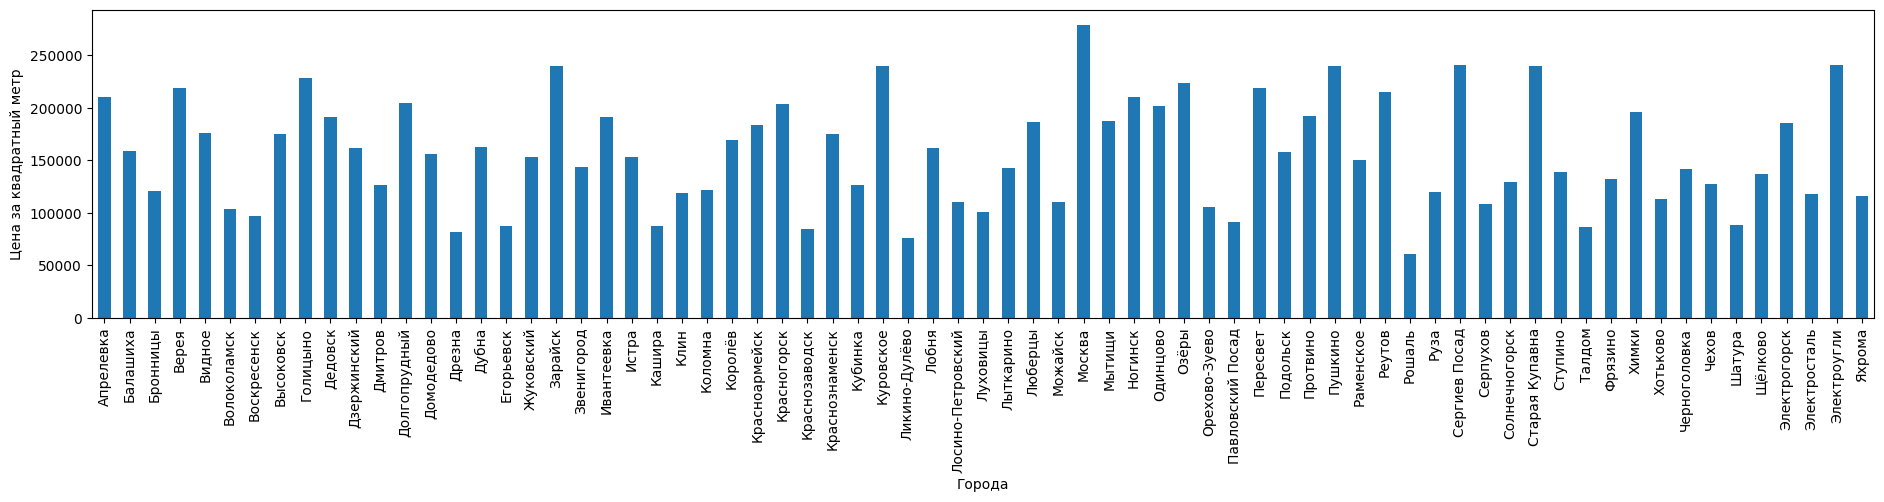

In [ ]:
# Расчёт средней цены квадратного метра для каждого города
average_price_per_square_meter = data.groupby("location")['price_per_m2'].mean().sort_values(ascending=False).to_string()
print("Цена за квадратный метр по городам:\n")
print(average_price_per_square_meter)


average_price_per_square_meter = data.groupby("location")['price_per_m2'].mean()[:125]
labels = average_price_per_square_meter.index
values = average_price_per_square_meter.values

# Преобразование в pd.Series
cities_series = pd.Series(values, index=labels)

# Установка размеров полотна
plt.figure(figsize=(23, 4))

# Создание диаграммы
cities_series.plot(kind='bar')

# Добавление названий осей
plt.xlabel('Города')
plt.ylabel('Цена за квадратный метр')

# Вывод диаграммы
plt.show()

In [ ]:
# Создаем словарь для хранения улиц по районам
street_by_district = {}

# Группируем датасет по районам и получаем уникальные улицы для каждого района
grouped = data.groupby('location')['street'].unique()

# Заполняем словарь улицами для каждого района
for district, street in grouped.items():
    street_by_district[district] = street.tolist()

# Выводим словарь на экран
print(street_by_district)

with open("street.json", "w") as file:
    json.dump(street_by_district, file)

{'Апрелевка': ['Парковая', 'Яна Фабрициуса', 'Есауленко'], 'Балашиха': ['Балашихинское шоссе', 'Поликахина', 'Струве', 'Крупской', 'шоссе Энтузиастов', 'проспект Ленина', 'Брагина', 'Орджоникидзе', 'Яганова', 'Саввинская', 'Кольцевая', 'Дмитриева', 'Автозаводская', 'Пионерская', 'Молодежная', 'Речная', 'Демин луг', 'Советская', 'Романычева', 'Колхозная', 'Реутовская', 'Жилгородок', 'Твардовского', 'Некрасова', 'Чехова', 'Троицкая', 'Октябрьская', 'Детская', 'Лесопарковая', 'Луговая', 'Евстафьева', 'Зеленая', 'проспект Героев', 'Московская', 'Свердлова', 'Корнилаева', 'Лукино', 'Карбышева', 'Звездная', 'Строителей', 'Черняховского', 'Солнечная', 'Юбилейная', 'Ситникова', 'Граничная', '40 лет Победы', 'Бояринова', 'Текстильщиков', 'бульвар Горенский', 'Кожедуба', 'Спортивная', 'Московский проезд', 'шоссе Косинское', 'Ляхова', 'Колдунова', 'Андрея Белого', 'Заречная', 'шоссе Саввинское', 'Калинина', 'Новая', 'Смельчак', 'Парковая', 'Победы', 'Школьная', 'Садовая', 'Маршала Говорова', 'Мещ

In [ ]:
# Создаем словарь для хранения улиц по районам
street_by_district = {}

# Группируем датасет по районам и получаем уникальные улицы для каждого района
grouped = data.groupby('street')['district'].unique()

# Заполняем словарь улицами для каждого района
for district, street in grouped.items():
    street_by_district[district] = street.tolist()

# Выводим словарь на экран
print(street_by_district)

with open("district.json", "w") as file:
    json.dump(street_by_district, file)

{'1 мая': ['Краснозаводск', 'Отсутствует', 'Ликино-Дулево', 'Павловский Посад'], '1-я Ватутинская': ['Отсутствует'], '1-я Владимирская': ['Перово'], '1-я Коммунистическая': ['Отсутствует'], '1-я Лесная': ['Отсутствует'], '1-я Первомайская': ['Рошаль'], '11-я Парковая': ['Северное Измайлово', 'Восточное Измайлово'], '2-й Хорошевский проезд': ['Хорошевский'], '2-я Володарская': ['Солнечногорск'], '2-я Институтская': ['Отсутствует'], '2-я Комсомольская': ['Дмитров', 'Отсутствует'], '2-я Пугачевская': ['Преображенское'], '2-я Рабочая': ['Хотьково'], '2-я Радиальная': ['Отсутствует', 'Видное'], '20 января': ['Можайск'], '25 лет Октября': ['Отсутствует'], '25-го съезда': ['Отсутствует'], '3-го Интернационала': ['Рошаль'], '3-е Почтовое Отделение': ['Отсутствует'], '3-я Красногорская': ['Отсутствует'], '3-я Парковая': ['Измайлово', 'Отсутствует'], '30 лет ВЛКСМ': ['Ликино-Дулево'], '40 лет Октября': ['Отсутствует', 'Цемгигант мкр'], '40 лет Победы': ['Краснозаводск', 'Отсутствует'], '43-й Арм

In [ ]:
# Создаем словарь для хранения улиц по районам
street_by_district = {}

# Группируем датасет по районам и получаем уникальные улицы для каждого района
grouped = data.groupby('street')['residential_complex'].unique()

# Заполняем словарь улицами для каждого района
for district, street in grouped.items():
    street_by_district[district] = street.tolist()

# Выводим словарь на экран
print(street_by_district)

with open("residential_complex.json", "w") as file:
    json.dump(street_by_district, file)

{'1 мая': ['Отсутствует'], '1-я Ватутинская': ['Russian Design District'], '1-я Владимирская': ['Отсутствует'], '1-я Коммунистическая': ['Отсутствует'], '1-я Лесная': ['Подрезково', 'Отсутствует'], '1-я Первомайская': ['Отсутствует'], '11-я Парковая': ['Отсутствует'], '2-й Хорошевский проезд': ['Отсутствует'], '2-я Володарская': ['Отсутствует'], '2-я Институтская': ['Спутник (Мытищи)', 'Отсутствует'], '2-я Комсомольская': ['На Высоковольтной'], '2-я Пугачевская': ['Отсутствует'], '2-я Рабочая': ['Отсутствует'], '2-я Радиальная': ['Отсутствует'], '20 января': ['Отсутствует'], '25 лет Октября': ['Отсутствует'], '25-го съезда': ['Отсутствует'], '3-го Интернационала': ['Отсутствует'], '3-е Почтовое Отделение': ['Отсутствует', 'Атлетик Хаус', 'Жулебино парк'], '3-я Красногорская': ['Отсутствует'], '3-я Парковая': ['Отсутствует'], '30 лет ВЛКСМ': ['Отсутствует'], '40 лет Октября': ['Отсутствует'], '40 лет Победы': ['Отсутствует', 'Балашиха'], '43-й Армии': ['Подольские просторы', 'Отсутствуе

In [ ]:
# Сохранение изменений цен для отображения прогнозов
import numpy as np
from sklearn.linear_model import LinearRegression

# датасет Dynamics
df = {'location': [], 'feb_apr, %': [], 'apr_may, %': [], 'forecast, %': []}
df = pd.DataFrame(df)

unique_locations = list(data['location'].unique())

for n in unique_locations:
  masks = data['location'] == n
  result = data[masks]

  # количество строк
  num_rows = len(result)

  # Среднее изменение в руб
  total_prices = result[['price_feb', 'price_apr', 'price_may']].sum()
  average_prices = (total_prices / num_rows).astype(int)

  # Среднее изменение в %
  feb_apr = ((average_prices['price_apr'] - average_prices['price_feb']) / average_prices['price_feb']) * 100
  apr_may = ((average_prices['price_may'] - average_prices['price_apr']) / average_prices['price_apr']) * 100

  # Создаем матрицу X для линейной регрессии
  X = np.array([[1], [2], [3]])  # время изменений цен

  # Создаем матрицу Y для линейной регрессии
  Y = np.array([average_price_feb, average_price_apr, average_price_may])  # изменения цен

  # Создаем линейную регрессию
  lr_model = LinearRegression()
  lr_model.fit(X, Y)

  # Создаем матрицу для прогноза цены на следующий шаг
  X_pred = np.array([[4]])  # время следующего изменения цены

  # Проводим прогноз
  price_pred = int(lr_model.predict(X_pred)[0])

  # Изменение в процентах
  forecast = ((price_pred - average_price_may)/average_price_may) * 100

  # Новая строка
  df.loc[len(df.index)] = [n, round(feb_apr, 2), round(apr_may, 2), round(forecast, 2)]

display(df)

df.to_csv('price_dynamics.csv', index=False)

,location,"feb_apr, %","apr_may, %","forecast, %"
0,Пересвет,-2.20,-1.11,-1.87
1,Верея,-1.96,-1.11,-1.87
2,Черноголовка,-2.45,-0.72,-1.87
3,Дрезна,-2.34,-0.98,-1.87
4,Дзержинский,-2.40,-0.80,-1.87
...,...,...,...,...
66,Видное,-2.35,-0.81,-1.87
67,Воскресенск,-2.34,-0.84,-1.87
68,Зарайск,-2.55,-0.61,-1.87
69,Жуковский,-2.29,-0.88,-1.87


In [ ]:
# установка новых значений категориальным данным для уменьшения занимаемоего места датафреймом, а также для быстродействия выполнения действий с данными
sp_2 = ["district",	"street", "residential_complex", "location"]
marks_list_1 = list(set(data[sp_2[0]].tolist()))
marks_list_2 = list(set(data[sp_2[1]].tolist()))
marks_list_3 = list(set(data[sp_2[2]].tolist()))
marks_list_4 = list(set(data[sp_2[3]].tolist()))

sp = [marks_list_1, marks_list_2, marks_list_3, marks_list_4] # столбцы со значениями, которые нужно нормализовать
categorical_values = {}
for column in sp_2:
    categorical_values[column] = {}
    unique_values = list(set(data[column].tolist()))
    for i, value in enumerate(unique_values):
        data[column].mask(data[column] == value, i, inplace=True)
        categorical_values[column][value] = i

for column, values_dict in categorical_values.items():
    print(f"Категория: {column}")
    for value, category in values_dict.items():
        print(f"Значение: {value}, Категория: {category}")
    print()


# Экспорт словарей
import json

for column, values_dict in categorical_values.items():
    with open(f"{column}_dictionary.json", "w") as file:
        json.dump(values_dict, file)

Категория: district
Значение: Губернский мкр, Категория: 0
Значение: Отрадное, Категория: 1
Значение: Егорьевск, Категория: 2
Значение: мкр. Щелково-7, Категория: 3
Значение: Клин, Категория: 4
Значение: Бронницы, Категория: 5
Значение: мкр. Барыбино, Категория: 6
Значение: мкр. Репинский, Категория: 7
Значение: Волоколамск, Категория: 8
Значение: Бутырский, Категория: 9
Значение: Краснозаводск, Категория: 10
Значение: Восточное Дегунино, Категория: 11
Значение: Лефортово, Категория: 12
Значение: Царицыно, Категория: 13
Значение: Ступино, Категория: 14
Значение: Черноголовка, Категория: 15
Значение: Мытищи, Категория: 16
Значение: Павловский Посад, Категория: 17
Значение: Северное Медведково, Категория: 18
Значение: мкр. Кузнечики, Категория: 19
Значение: Адлерский, Категория: 20
Значение: Колыберево мкр, Категория: 21
Значение: мкр. Саввино, Категория: 22
Значение: Город Счастья ЖК, Категория: 23
Значение: Чертаново Центральное, Категория: 24
Значение: Щукино, Категория: 25
Значение: 

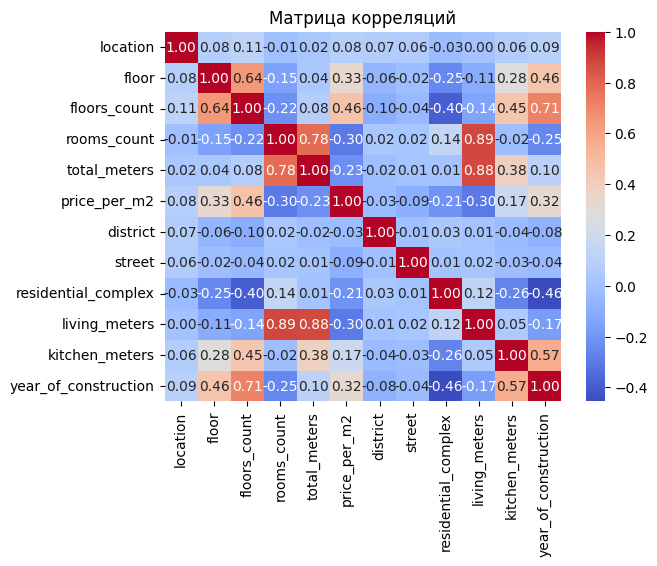

In [ ]:
spisok = ["location",	"floor",	"floors_count",
          "rooms_count",	"total_meters",	"price_per_m2",
          "district",	"street", "residential_complex",
          "living_meters", "kitchen_meters", "year_of_construction"]

# Вычисление матрицы коррелиций
corr_matrix = data[spisok].corr()

# Отображение матрицы
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [ ]:
# Конвертирование из объектов в float
data['kitchen_meters'] = data['kitchen_meters'].astype(float)
data['year_of_construction'] = data['year_of_construction'].astype(float)
data['location'] = data['location'].astype(float)
data['district'] = data['district'].astype(float)
data['street'] = data['street'].astype(float)
data['residential_complex'] = data['residential_complex'].astype(float)
print(X_train.dtypes)

location                float64
floor                   float64
floors_count            float64
rooms_count             float64
total_meters            float64
district                float64
street                  float64
residential_complex     float64
living_meters           float64
kitchen_meters          float64
year_of_construction    float64
dtype: object


In [ ]:
# Выбор признаков для обучения модели
spisok = ["location",	"floor",	"floors_count",
          "rooms_count",	"total_meters",

          "district",	"street", "residential_complex",
          "living_meters", "kitchen_meters", "year_of_construction"]

# Разделение данных на обучающую и тестовую выборки
X = data[spisok]
y = data['price_per_m2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.1 MB/s eta 0:00:00


**МЕТОД CatBoost**

In [ ]:
import catboost
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Обучение модели регрессии
model = catboost.CatBoostRegressor(verbose=False)
model.fit(X_train, y_train)

# # Параметры для случайного перебора
# param_dist = {'n_estimators': sp_randint(100, 500)}
# # Создание объекта RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=model,
#                                    param_distributions=param_dist,
#                                    n_iter=10, cv=5)
# # Поиск лучших гиперпараметров
# random_search.fit(X_train, y_train)
# best_model = random_search.best_estimator_

# Прогнозирование цены квадратного метра
y_pred = model.predict(X_test)

# Оценка точности модели тремя методами (Кросс-валидация, отложенная выборка, перекрёстная проверка по случайным блокам)
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Метод кросс-валидации:",round(scores.mean(), 2))

accuracy = model.score(X_test, y_test)
print('Метод отложенной выборки:', round(accuracy, 2))

scores = cross_val_score(model, X, y, cv=(ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)))
print("Метод перекрестной проверки по случайным блокам:", round(scores.mean(), 2))

mae = mean_absolute_error(y_test, y_pred)
print("Метод MAE: ", round(mae, 2), sep="")

Метод кросс-валидации: 0.74
Метод отложенной выборки: 0.8
Метод перекрестной проверки по случайным блокам: 0.79
Метод MAE: 17161.36


**МЕТОД XGBoost**

In [ ]:
import xgboost as xgb

# Обучение модели регрессии
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# # Параметры для случайного перебора
# param_dist = {'n_estimators': sp_randint(100, 500)}
# # Создание объекта RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=model,
#                                    param_distributions=param_dist,
#                                    n_iter=10, cv=5)
# # Поиск лучших гиперпараметров
# random_search.fit(X_train, y_train)
# best_model = random_search.best_estimator_

# Прогнозирование цены квадратного метра
y_pred = model.predict(X_test)

# Оценка точности модели тремя методами (Кросс-валидация, отложенная выборка, перекрёстная проверка по случайным блокам)
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Метод кросс-валидации:",round(scores.mean(), 2))

accuracy = model.score(X_test, y_test)
print('Метод отложенной выборки:', round(accuracy, 2))

scores = cross_val_score(model, X, y, cv=(ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)))
print("Метод перекрестной проверки по случайным блокам:", round(scores.mean(), 2))

mae = mean_absolute_error(y_test, y_pred)
print("Метод MAE: ", round(mae, 2), sep="")

Метод кросс-валидации: 0.72
Метод отложенной выборки: 0.78
Метод перекрестной проверки по случайным блокам: 0.79
Метод MAE: 17236.76


**МЕТОД СЛУЧАЙНОГО ЛЕСА**

In [ ]:
# Обучение модели регрессии
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# # Параметры для случайного перебора
# param_dist = {'n_estimators': sp_randint(100, 500)}
# # Создание объекта RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=model,
#                                    param_distributions=param_dist,
#                                    n_iter=10, cv=5)
# # Поиск лучших гиперпараметров
# random_search.fit(X_train, y_train)
# best_model = random_search.best_estimator_

# Прогнозирование цены квадратного метра
y_pred = model.predict(X_test)

# Оценка точности модели тремя методами (Кросс-валидация, отложенная выборка, перекрёстная проверка по случайным блокам)
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Метод кросс-валидации:",round(scores.mean(), 2))

accuracy = model.score(X_test, y_test)
print('Метод отложенной выборки:', round(accuracy, 2))

scores = cross_val_score(model, X, y, cv=(ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)))
print("Метод перекрестной проверки по случайным блокам:", round(scores.mean(), 2))

mae = mean_absolute_error(y_test, y_pred)
print("Метод MAE: ", round(mae, 2), sep="")

Метод кросс-валидации: 0.66
Метод отложенной выборки: 0.77
Метод перекрестной проверки по случайным блокам: 0.77
Метод MAE: 17219.09


**МЕТОД АДАПТИВНОГО БУСТИНГА**

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor

# Обучение модели регрессии
model = AdaBoostRegressor()
model.fit(X_train, y_train)

# # Параметры для случайного перебора
# param_dist = {'n_estimators': sp_randint(100, 500)}
# # Создание объекта RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=model,
#                                    param_distributions=param_dist,
#                                    n_iter=10, cv=5)
# # Поиск лучших гиперпараметров
# random_search.fit(X_train, y_train)
# best_model = random_search.best_estimator_

# Прогнозирование цены квадратного метра
y_pred = model.predict(X_test)

# Оценка точности модели тремя методами (Кросс-валидация, отложенная выборка, перекрёстная проверка по случайным блокам)
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Метод кросс-валидации:",round(scores.mean(), 2))

accuracy = model.score(X_test, y_test)
print('Метод отложенной выборки:', round(accuracy, 2))

scores = cross_val_score(model, X, y, cv=(ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)))
print("Метод перекрестной проверки по случайным блокам:", round(scores.mean(), 2))

mae = mean_absolute_error(y_test, y_pred)
print("Метод MAE: ", round(mae, 2), sep="")

Метод кросс-валидации: 0.65
Метод отложенной выборки: 0.65
Метод перекрестной проверки по случайным блокам: 0.66
Метод MAE: 22045.9


**В ИТОГЕ БЫЛ ВЫБРАН МЕТОД CatBoost, ТК ОН ВЫДАЁТ ПОГРЕШНОСТЬ В 17161.36 РУБЛЕЙ ЗА КВАДРАТНЫЙ МЕТР**

In [ ]:
# Создание DataFrame с предсказанными и фактическими значениями
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Вывод таблицы с предсказанными значениями
display(predictions)

,Actual,Predicted
749,137500.0,152235.436607
13187,122222.222222,134439.704594
11709,130158.730159,116964.923836
2980,175806.451613,180197.593695
8618,272500.0,261185.868773
...,...,...
6021,129411.764706,163932.576011
7076,169354.83871,172061.843805
7146,262580.645161,223169.893937
6867,320256.410256,304817.310611


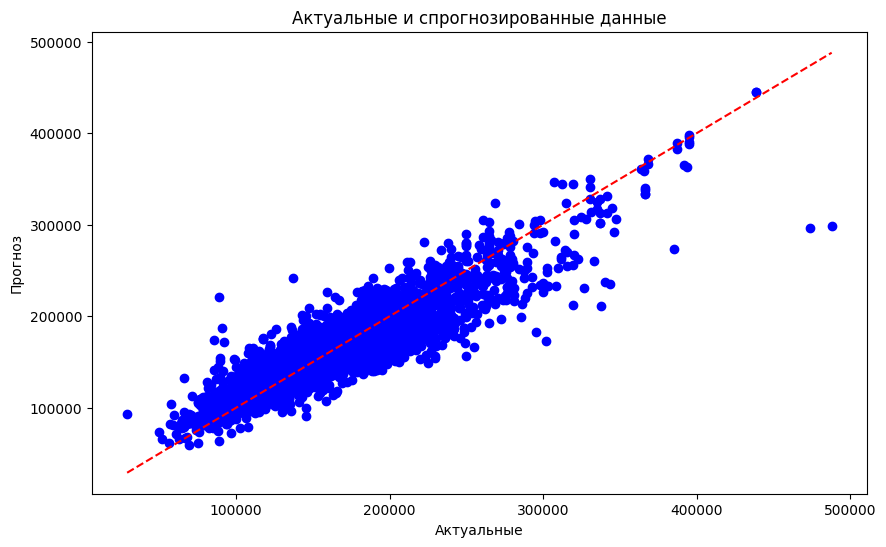

In [ ]:
# Создание графика предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Актуальные')
plt.ylabel('Прогноз')
plt.title('Актуальные и спрогнозированные данные')
plt.show()

In [ ]:
# Сохранение обученной модели
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Сохранение обработанного датасета
data.to_csv('dataset.csv', index=False)